# HOUSE PRICE PREDICTION

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('files/Kaggle Competition/House Prediction/new.csv', encoding= 'unicode_escape')

C:\Users\Bala\Python\Anaconda3\envs\playground\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (1,11,12,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,url,id,Lng,Lat,Cid,tradeTime,DOM,followers,totalPrice,price,...,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
0,https://bj.lianjia.com/chengjiao/101084782030....,101084782030,116.475489,40.019520,1111027376244,2016-08-09,1464.0,106,415.0,31680,...,1.0,2005,3,6,0.217,1.0,0.0,1.0,7,56021.0
1,https://bj.lianjia.com/chengjiao/101086012217....,101086012217,116.453917,39.881534,1111027381879,2016-07-28,903.0,126,575.0,43436,...,1.0,2004,4,6,0.667,1.0,1.0,0.0,7,71539.0
2,https://bj.lianjia.com/chengjiao/101086041636....,101086041636,116.561978,39.877145,1111040862969,2016-12-11,1271.0,48,1030.0,52021,...,4.0,2005,3,6,0.500,1.0,0.0,0.0,7,48160.0
3,https://bj.lianjia.com/chengjiao/101086406841....,101086406841,116.438010,40.076114,1111043185817,2016-09-30,965.0,138,297.5,22202,...,1.0,2008,1,6,0.273,1.0,0.0,0.0,6,51238.0
4,https://bj.lianjia.com/chengjiao/101086920653....,101086920653,116.428392,39.886229,1111027381174,2016-08-28,927.0,286,392.0,48396,...,4.0,1960,2,2,0.333,0.0,1.0,1.0,1,62588.0


In [4]:
df.describe()

,Lng,Lat,Cid,DOM,followers,totalPrice,price,square,kitchen,buildingType,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
count,318851.000000,318851.000000,3.188510e+05,160874.000000,318851.000000,318851.000000,318851.000000,318851.000000,318851.000000,316830.000000,318851.000000,318851.000000,3.188510e+05,318819.000000,318819.000000,318819.000000,318851.000000,318388.000000
mean,116.418459,39.949591,1.129113e+12,28.822339,16.731508,349.030201,43530.436379,83.240597,0.994599,3.009790,2.606330,4.451026,6.316486e+01,0.577055,0.645601,0.601112,6.763564,63682.446305
std,0.112054,0.091983,2.363447e+12,50.237343,34.209185,230.780778,21709.024204,37.234661,0.109609,1.269857,1.311739,1.901753,2.506851e+04,0.494028,0.478331,0.489670,2.812616,22329.215447
min,116.072514,39.627030,1.111027e+12,1.000000,0.000000,0.100000,1.000000,6.900000,0.000000,0.048000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,10847.000000
25%,116.344985,39.893200,1.111027e+12,1.000000,0.000000,205.000000,28050.000000,57.900000,1.000000,1.000000,1.000000,2.000000,2.500000e-01,0.000000,0.000000,0.000000,6.000000,46339.000000
50%,116.416780,39.934527,1.111027e+12,6.000000,5.000000,294.000000,38737.000000,74.260000,1.000000,4.000000,3.000000,6.000000,3.330000e-01,1.000000,1.000000,1.000000,7.000000,59015.000000
75%,116.477581,40.003018,1.111027e+12,37.000000,18.000000,425.500000,53819.500000,98.710000,1.000000,4.000000,4.000000,6.000000,5.000000e-01,1.000000,1.000000,1.000000,8.000000,75950.000000
max,116.732378,40.252758,1.114620e+15,1677.000000,1143.000000,18130.000000,156250.000000,1745.500000,4.000000,4.000000,4.000000,6.000000,1.000940e+07,1.000000,1.000000,1.000000,13.000000,183109.000000


In [5]:
df.shape

(318851, 26)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318851 entries, 0 to 318850
Data columns (total 26 columns):
url                    318851 non-null object
id                     318851 non-null object
Lng                    318851 non-null float64
Lat                    318851 non-null float64
Cid                    318851 non-null int64
tradeTime              318851 non-null object
DOM                    160874 non-null float64
followers              318851 non-null int64
totalPrice             318851 non-null float64
price                  318851 non-null int64
square                 318851 non-null float64
livingRoom             318851 non-null object
drawingRoom            318851 non-null object
kitchen                318851 non-null int64
bathRoom               318851 non-null object
floor                  318851 non-null object
buildingType           316830 non-null float64
constructionTime       318851 non-null object
renovationCondition    318851 non-null int64
buildingStruct

In [7]:
df.isnull().sum()

url                         0
id                          0
Lng                         0
Lat                         0
Cid                         0
tradeTime                   0
DOM                    157977
followers                   0
totalPrice                  0
price                       0
square                      0
livingRoom                  0
drawingRoom                 0
kitchen                     0
bathRoom                    0
floor                       0
buildingType             2021
constructionTime            0
renovationCondition         0
buildingStructure           0
ladderRatio                 0
elevator                   32
fiveYearsProperty          32
subway                     32
district                    0
communityAverage          463
dtype: int64

In [8]:
df.shape[0]/2

159425.5

In [9]:
df.drop(columns=['url','id','DOM'], inplace=True)

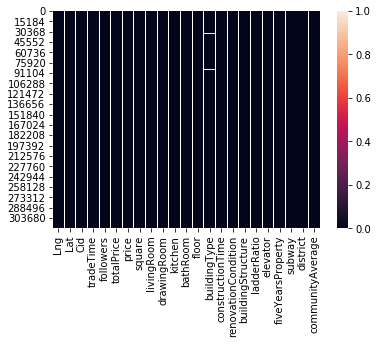

In [10]:
sns.heatmap(df.isnull())

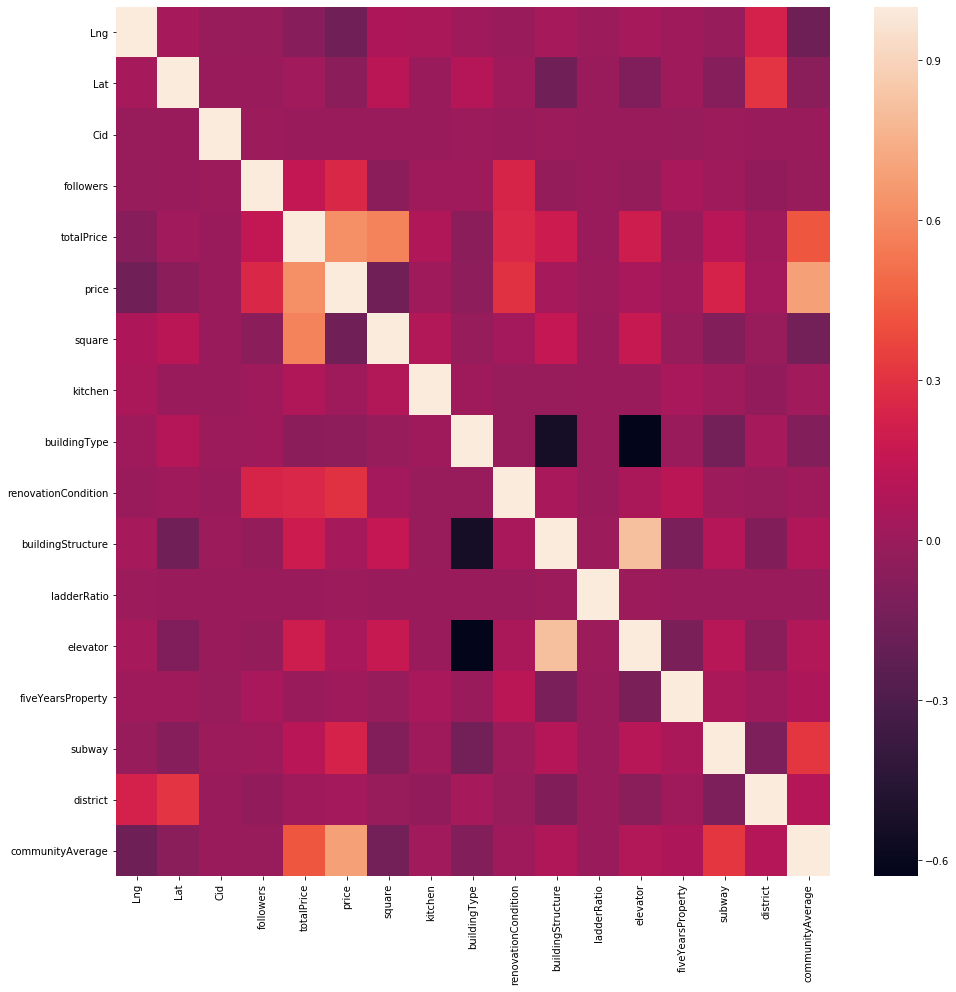

In [11]:
plt.figure(figsize=(16, 16))
sns.heatmap(df.corr())

In [12]:
for column in df:
    if len(df[column].value_counts()) <= 20:
        print(column)
        print(df[column].value_counts(), end='\n') 
        print('\n')

kitchen
1    315290
0      2680
2       828
3        29
4        24
Name: kitchen, dtype: int64


buildingType
4.000    172405
1.000     84541
3.000     59715
2.000       137
0.500        15
0.333         5
0.048         4
0.125         3
0.250         2
0.429         1
0.375         1
0.667         1
Name: buildingType, dtype: int64


renovationCondition
1    118746
4    117438
3     77251
2      5390
0        26
Name: renovationCondition, dtype: int64


buildingStructure
6    188067
2    115779
4     14341
3       253
1       196
5       187
0        28
Name: buildingStructure, dtype: int64


elevator
1.0    183976
0.0    134843
Name: elevator, dtype: int64


fiveYearsProperty
1.0    205830
0.0    112989
Name: fiveYearsProperty, dtype: int64


subway
1.0    191646
0.0    127173
Name: subway, dtype: int64


district
7     107244
6      38634
8      38200
10     31293
2      29338
1      17086
4      15313
11     13974
9      11371
13      9202
5       2955
3       2537
12      1704
Na

In [13]:
def replaceWithMode(column, value):
    df[column].replace(value,df[column].mode()[0], inplace=True)

In [14]:
replaceWithMode('renovationCondition', 0)

In [15]:
replaceWithMode('buildingStructure', 0)

In [16]:
df['renovationCondition'].value_counts()

1    118772
4    117438
3     77251
2      5390
Name: renovationCondition, dtype: int64

In [17]:
filt = df['buildingType'] < 1
df.loc[filt, 'buildingType'] = 0

In [18]:
df.buildingType.value_counts()

4.0    172405
1.0     84541
3.0     59715
2.0       137
0.0        32
Name: buildingType, dtype: int64

In [19]:
df['buildingType'].isnull().sum()

2021

In [20]:
replaceWithMode('buildingType', np.nan)

In [21]:
df['communityAverage'] = df['communityAverage'].fillna(df['communityAverage'].mean())

In [22]:
df['communityAverage'].mean()

63682.446304508965

In [23]:
df.elevator.value_counts()

1.0    183976
0.0    134843
Name: elevator, dtype: int64

In [24]:
replaceWithMode('elevator', np.nan)

In [25]:
df.fiveYearsProperty.value_counts()

1.0    205830
0.0    112989
Name: fiveYearsProperty, dtype: int64

In [26]:
replaceWithMode('fiveYearsProperty', np.nan)

In [27]:
df.district.value_counts()

7     107244
6      38634
8      38200
10     31293
2      29338
1      17086
4      15313
11     13974
9      11371
13      9202
5       2955
3       2537
12      1704
Name: district, dtype: int64

In [28]:
df.district.median()

7.0

In [29]:
df.district.mode()[0]

7

In [30]:
replaceWithMode('district', np.nan)

In [31]:
df.subway.value_counts()

1.0    191646
0.0    127173
Name: subway, dtype: int64

In [32]:
replaceWithMode('subway',np.nan)

In [33]:
df.isnull().sum()

Lng                    0
Lat                    0
Cid                    0
tradeTime              0
followers              0
totalPrice             0
price                  0
square                 0
livingRoom             0
drawingRoom            0
kitchen                0
bathRoom               0
floor                  0
buildingType           0
constructionTime       0
renovationCondition    0
buildingStructure      0
ladderRatio            0
elevator               0
fiveYearsProperty      0
subway                 0
district               0
communityAverage       0
dtype: int64

In [34]:
%%time
df['tradeTime'] = pd.to_datetime(df['tradeTime'])

Wall time: 56 ms


In [35]:
temp_df = df.groupby([df.tradeTime.dt.strftime('%Y')]).agg({'totalPrice':'mean'})


In [36]:
temp_df.columns

Index(['totalPrice'], dtype='object')

In [37]:
temp_df

,totalPrice
tradeTime,
2002,221.166667
2003,160.700000
2008,126.000000
2009,150.000000
2010,135.697354
2011,178.400166
2012,206.564979
2013,278.436985
2014,294.429793


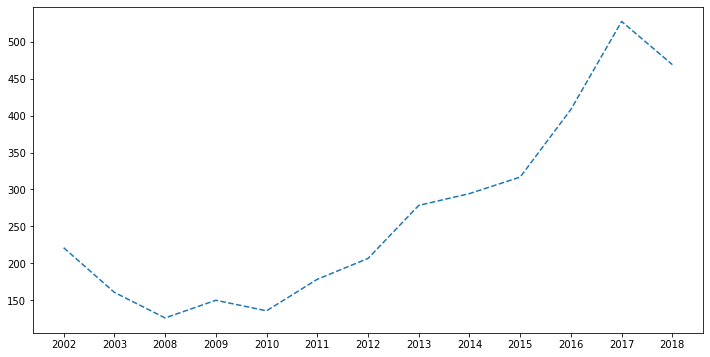

In [40]:
plt.figure(figsize=(12, 6))
plt.plot_date(temp_df.index, temp_df['totalPrice'], '--' )
